In [1]:
import pandas as pd
dataset=pd.read_csv("50_Startups.csv")
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)
#dataset

In [2]:
dataset.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_Florida', 'State_New York'],
      dtype='object')

In [3]:
input=dataset[['R&D Spend', 'Administration', 'Marketing Spend','State_Florida', 'State_New York']]
output=dataset[['Profit']]

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input,output, test_size=0.30,random_state=0)

In [48]:
from sklearn.tree import DecisionTreeRegressor # loaded DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion="absolute_error",splitter="best")
regressor=regressor.fit(x_train,y_train)

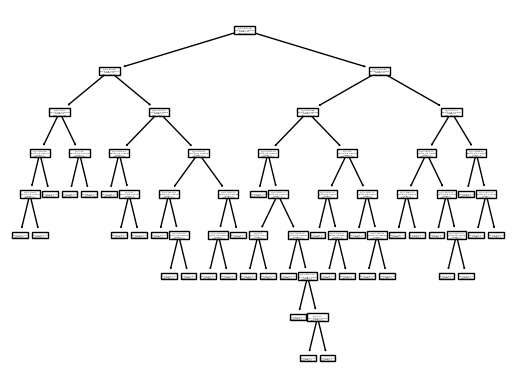

In [49]:
import matplotlib.pyplot as plt #matplotlib.pyplot is used for graphs
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [50]:
y_pred=regressor.predict(x_test)

In [51]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.9472935515672719

In [52]:
import pickle
filename="finalized_DecisionTree_Model.sav"
pickle.dump(regressor,open(filename,'wb'))

In [53]:
loaded_model=pickle.load(open(filename,'rb'))
result=loaded_model.predict([[123,123,123,1,0]])
result

C:\Users\sle8cob\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([42559.73])